# Deep Learning for Image Classification Assessment

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data


In [10]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data


In [2]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

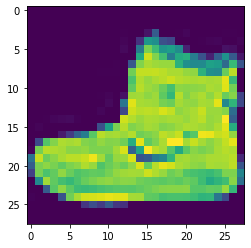

In [6]:
plt.imshow(x_train[0])

In [ ]:
from keras.preprocessing import 

## Preprocessing the Data

In [11]:
x_train=x_train/255
x_test=x_test/255

In [12]:
x_train.max()

1.0

In [13]:
x_test.max()

1.0

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train=x_train.reshape(60000, 28, 28,1)
x_test.shape

(10000, 28, 28)

In [17]:
x_test=x_test.reshape(10000, 28, 28,1)

In [18]:
from keras.utils import to_categorical

In [22]:
y_test_encoded=to_categorical(y_test)
y_train_encoded=to_categorical(y_train)

## Building the Model

In [23]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Activation,Dropout,MaxPooling2D,Flatten

In [31]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

W0809 22:37:46.071382  4324 deprecation_wrapper.py:119] From C:\Users\Kartikay Raheja\.conda\envs\opencv-env\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 22:37:46.074373  4324 deprecation_wrapper.py:119] From C:\Users\Kartikay Raheja\.conda\envs\opencv-env\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0809 22:37:46.095033  4324 deprecation_wrapper.py:119] From C:\Users\Kartikay Raheja\.conda\envs\opencv-env\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0809 22:37:46.177236  4324 deprecation_wrapper.py:119] From C:\Users\Kartikay Raheja\.conda\envs\opencv-env\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model


In [33]:
model.fit(x_train,y_train_encoded,epochs=10)

W0809 22:38:17.624882  4324 deprecation.py:323] From C:\Users\Kartikay Raheja\.conda\envs\opencv-env\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0809 22:38:17.709436  4324 deprecation_wrapper.py:119] From C:\Users\Kartikay Raheja\.conda\envs\opencv-env\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 44s 729us/step - loss: 0.3976 - acc: 0.8575
Epoch 2/10
60000/60000 [==============================] - 42s 693us/step - loss: 0.2777 - acc: 0.9002
Epoch 3/10
60000/60000 [==============================] - 39s 645us/step - loss: 0.2423 - acc: 0.9128
Epoch 4/10
60000/60000 [==============================] - 38s 626us/step - loss: 0.2177 - acc: 0.9215
Epoch 5/10
60000/60000 [==============================] - 37s 614us/step - loss: 0.2004 - acc: 0.9291
Epoch 6/10
60000/60000 [==============================] - 36s 595us/step - loss: 0.1854 - acc: 0.9341
Epoch 7/10
60000/60000 [==============================] - 35s 577us/step - loss: 0.1728 - acc: 0.9395
Epoch 8/10
60000/60000 [==============================] - 37s 612us/step - loss: 0.1648 - acc: 0.9428
Epoch 9/10
60000/60000 [==============================] - 36s 602us/step - loss: 0.1552 - acc: 0.9449
Epoch 10/10
60000/60000 [==============================] - 36s 607us/step - loss: 

### Evaluating the Model

In [34]:
model.metrics_names

['loss', 'acc']

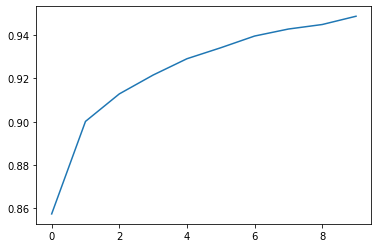

In [72]:
plt.plot(model.history.history['acc'])

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
pred=model.predict_classes(x_test)

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.88      0.86      1000
           3       0.90      0.92      0.91      1000
           4       0.84      0.88      0.86      1000
           5       0.99      0.96      0.97      1000
           6       0.79      0.67      0.73      1000
           7       0.92      0.99      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Text(0.5, 1, 'Confusion Matrix')

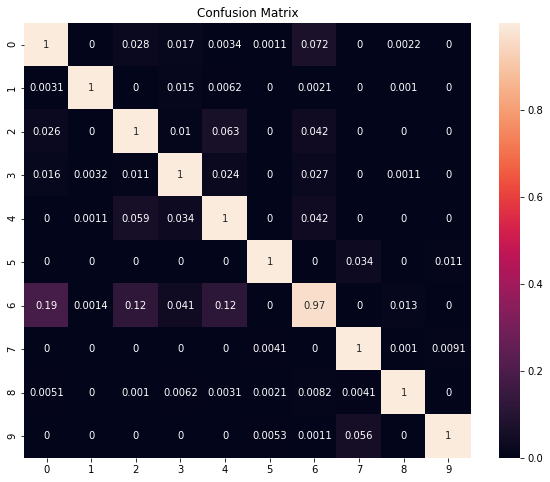

In [47]:
import seaborn as sns
from sklearn.preprocessing import normalize
plt.figure(figsize=(10,8))
sns.heatmap(normalize(confusion_matrix(y_test,pred)),annot=True)
plt.title('Confusion Matrix')